In [95]:
from sklearn.preprocessing import StandardScaler # 표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler # 정규화(정해진 규칙 기준, min-max기준)
from sklearn.datasets import load_iris

In [305]:
# 주요 라이브러리 import

# 주요 라이브러리 import
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm

In [306]:
# 디렉토리 및 파일 이름에 맞추어 변경
# font_location = '/Library/Fonts/Arial Unicode.ttf'#윈도우안에있는 폰트파일주소.
font_location = '../Jalnan.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [97]:
iris = load_iris()

In [98]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [99]:
type(iris) #dic를 wrapping(boxing) class

sklearn.utils.Bunch

In [100]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [101]:
iris.data[:5] # 2차원

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [102]:
iris.target # 1차원

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [103]:
len(iris.data)

150

In [104]:
df = pd.DataFrame(iris.data, # 2ndarray
                  columns=iris.feature_names # 리스트
                 )
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [105]:
df["species"] = iris.target

In [106]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [108]:
df['species'] = df['species'].astype('category')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [110]:
df['species'] = df['species'].cat.rename_categories(iris.target_names)
df['species']
# 라벨인코딩은 abc순서대로 되어있기 때문에, abc순서대로 rename된다.

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

In [111]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [112]:
df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

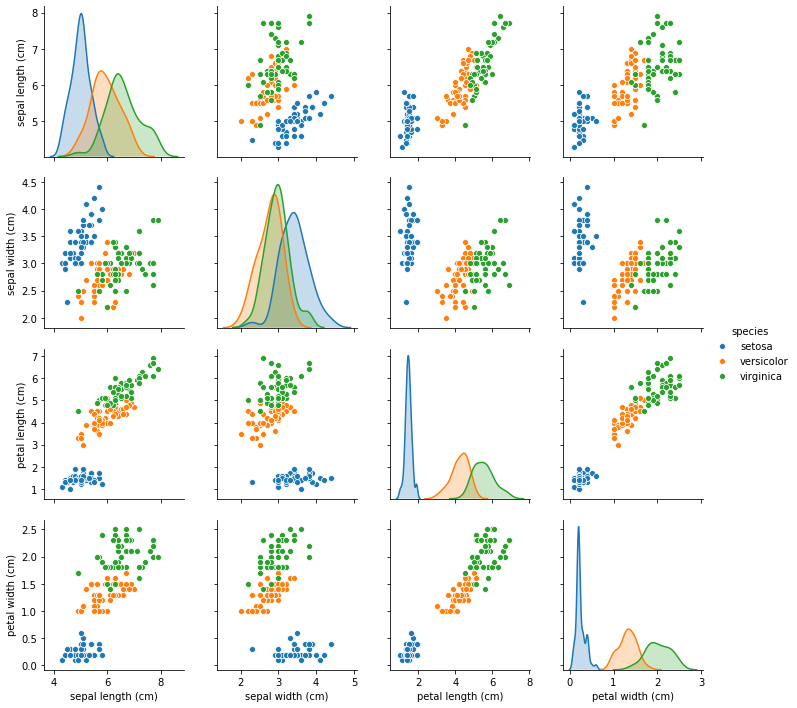

In [113]:
# pairplot
sns.pairplot(df, hue = 'species')

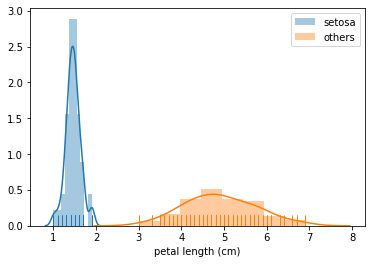

In [114]:
sns.distplot(df[df.species == 'setosa']['petal length (cm)'], hist=True, rug=True, label='setosa')
sns.distplot(df[df.species != 'setosa']['petal length (cm)'], hist=True, rug=True, label='others')
plt.legend()
plt.show()

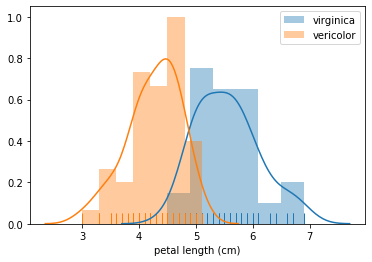

In [115]:
# virginica, versicolor
sns.distplot(df[df.species == 'virginica']['petal length (cm)'], hist=True, rug=True, label='virginica')
sns.distplot(df[df.species == 'versicolor']['petal length (cm)'], hist=True, rug=True, label='vericolor')
plt.legend()
plt.show()

setosa가 꽃잎의 길이가 제일 짧다, virginica가 제일 길다.<br>
꽃잎의 길이가 1.5전후 짧은 것은 모두 다 setosa이다.<br>
virginica가 versicolor보다는 꽃잎의 길이가 야간 긴 편이지만,<br>
종을 판별하기 위한 절대적인 기준은 되지 않는다.

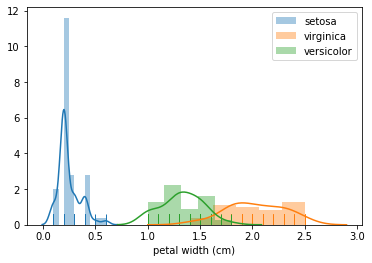

In [116]:
# petal width, 3개의 품종을 비교
sns.distplot(df[df.species == 'setosa']['petal width (cm)'], hist=True, rug=True, label='setosa')
sns.distplot(df[df.species == 'virginica']['petal width (cm)'], hist=True, rug=True, label='virginica')
sns.distplot(df[df.species == 'versicolor']['petal width (cm)'], hist=True, rug=True, label='versicolor')
plt.legend()
plt.show()

### 꽃잎의 너비를 비교 결과
setosa가 제일 작은 꽃이다.<br>
전체적인 꽃잎의 크기는 virginica가 제일 크다.<br>
꽃잎의 너비가 다른 꽃 보다 상대적으로 많이 setosa가 작으므로,<br>
(꽃잎의 너비 1 미만은 모두 setosa)<br>
꽃잎의 너비는 iris의 품종을 분류하기에 적합한 항목이 된다.

In [117]:
from pandas.plotting import parallel_coordinates

Text(0, 0.5, 'Features values')

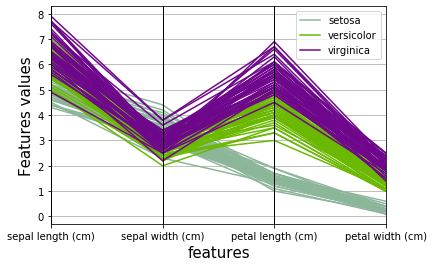

In [118]:
parallel_coordinates(df, 'species')
plt.xlabel('features', fontsize=15)
plt.ylabel('Features values', fontsize=15)

#### petal width, petal length는 학습의 중요 속성이 될 예정이르모 사용
#### sepal width, sepal length는 구분의 중요 속성이 아니므로 제거해도 될 것 같음

## sepal length, sepal width 각각 항목별로 꽃들이 어떤 차이를  가지는지 범위를 표준화 시켜 비교해본다.

In [119]:
ss = StandardScaler() # 표준(평균값 기준)

#### 표준화를 기준으로 인코딩을 하려고 함
#### fit -> transform, fit_transform
<br>

In [120]:
ss.fit_transform(df.iloc[:,:-1])[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [121]:
from sklearn.model_selection import train_test_split

In [223]:
X_train, X_test, y_train, y_test = train_test_split(
                                    df.iloc[:,:-1], # 문제,
                                    df.iloc[:,-1], # 정답,
                                    test_size=0.2, # 테스트 비율,
                                    random_state=42 # 랜덤 시드값
)

In [224]:
print('train data : ', X_train.shape, y_train.shape)
print('test data : ', X_test.shape, y_test.shape)

train data :  (120, 4) (120,)
test data :  (30, 4) (30,)


In [226]:
y_test.index

Int64Index([ 73,  18, 118,  78,  76,  31,  64, 141,  68,  82, 110,  12,  36,
              9,  19,  56, 104,  69,  55, 132,  29, 127,  26, 128, 131, 145,
            108, 143,  45,  30],
           dtype='int64')

In [227]:
y_test.value_counts()

virginica     11
setosa        10
versicolor     9
Name: species, dtype: int64

#### 스케일링 할 때, 전체 데이터나 훈련 데이터로 평균(fit)를 시키고,
#### 절대 검증 데이터로 fit시키지 않는다.
#### 훈련 데이터와 검증 데이터의 스케일링 기준이 달라지기 때문이다.

In [228]:
X_train_s = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns)
X_train_s[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-1.473937,1.203658,-1.562535,-1.312603
1,-0.133071,2.992376,-1.276006,-1.045633
2,1.085898,0.085709,0.385858,0.289218
3,-1.230143,0.756479,-1.218701,-1.312603
4,-1.717731,0.309299,-1.390618,-1.312603


In [229]:
X_test_s = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)
X_test_s[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.354517,-0.585060,0.557775,0.022248
1,-0.133071,1.650837,-1.161395,-1.179118
2,2.304867,-1.032239,1.818500,1.490583
3,0.232620,-0.361470,0.443164,0.422703
4,1.207795,-0.585060,0.615081,0.289218


In [230]:
ms = MinMaxScaler()

In [231]:
X_train_m = pd.DataFrame(ms.fit_transform(X_train), columns=X_train.columns)
X_train_m[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.088235,0.666667,0.000000,0.041667
1,0.411765,1.000000,0.087719,0.125000
2,0.705882,0.458333,0.596491,0.541667
3,0.147059,0.583333,0.105263,0.041667
4,0.029412,0.500000,0.052632,0.041667


In [232]:
X_test_m = pd.DataFrame(ms.transform(X_test), columns=X_test.columns)
X_test_m[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.529412,0.333333,0.649123,0.458333
1,0.411765,0.750000,0.122807,0.083333
2,1.000000,0.250000,1.035088,0.916667
3,0.500000,0.375000,0.614035,0.583333
4,0.735294,0.333333,0.666667,0.541667


In [233]:
ms_df_values = ms.fit_transform(df.iloc[:,:-1])
ms_df_values[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [234]:
ms_df = pd.DataFrame(data=ms_df_values, columns=iris.feature_names)
ms_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667


In [235]:
ms_df['species'] = iris.target
ms_df['species'] = ms_df['species'].astype('category')
ms_df['species'] = ms_df['species'].cat.rename_categories(iris.target_names)
ms_df['species'][:3]

0    setosa
1    setosa
2    setosa
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

Text(0, 0.5, 'features values')

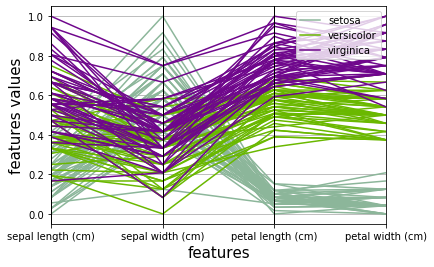

In [236]:
## 
parallel_coordinates(ms_df, 'species')
plt.xlabel('features', fontsize=15)
plt.ylabel('features values', fontsize=15)

In [237]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# cross_val_score : 다양한 샘플링을 해서 여러번 테스트 --> 평균치를 구해본다.
from sklearn.metrics import *

In [238]:
knn = KNeighborsClassifier()

In [239]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## 교차 검증
### 샘플링을 10개해서 10번 검증을 해보라는 의미
### X_train을 train data, validation data로 나눈다.
### cv(fold값)가 10이면 validation data를 X_train의 1/10로 잡음
### validation data의 개수는 12개 나머지가 train data

In [240]:
scores = cross_val_score(knn, X_train, y_train, cv=10) # cv = fold값!
print(scores)

[0.92307692 1.         1.         1.         0.83333333 0.83333333
 1.         1.         1.         0.90909091]


In [241]:
type(scores)

numpy.ndarray

In [242]:
np.mean(scores)

0.94988344988345

In [318]:
def print_metrics(model, x, y, k):
    scores = cross_val_score(model, x, y, cv=k) #cv = fold값
    print('----------교차검증 결과------------ :\n {}'.format(list(scores)))
    acc_mean = np.mean(scores)
    print('----------교차검증 평균---------- \n {:.2f}'.format(acc_mean))
#     pred = knn.predict(X_test)
#     acc = accuracy_score(y_test,pred)
#     print(acc)
    return scores, acc_mean

----------교차검증 결과------------ :
 [0.96, 1.0, 0.8333333333333334, 1.0, 0.9565217391304348]
----------교차검증 평균---------- 
 0.95


(array([ 1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  1.000,  2.000,
         0.000,  2.000]),
 array([ 0.833,  0.850,  0.867,  0.883,  0.900,  0.917,  0.933,  0.950,
         0.967,  0.983,  1.000]),
 <a list of 10 Patch objects>)

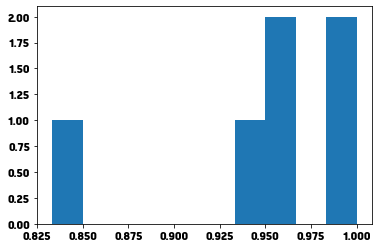

In [319]:
sc2, am2 = print_metrics(knn, X_train, y_train, 5)
list_sc2 = list(sc2)
list_sc2.append(am2) # 교차검증 평균도 함께 그리기
plt.hist(list_sc2)

In [320]:
pred = knn.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

0.36666666666666664

In [321]:
y_train.dtypes

CategoricalDtype(categories=['setosa', 'versicolor', 'virginica'], ordered=False)

In [322]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
                                                    ms_df.iloc[:, :-1], #문제,
                                                    ms_df.iloc[:, -1], #정답,
                                                    test_size=0.2, #테스트 비율,
                                                    random_state=42#랜덤 시드값
)

### 스케일링한 데이터로 knn fit -> 교차검증과 test data로 검증해서 
### 비교해보기

In [323]:
knn.fit(X_train_m, y_train_m)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

----------교차검증 결과------------ :
 [0.96, 1.0, 0.875, 1.0, 0.9565217391304348]
----------교차검증 평균---------- 
 0.96


(array([ 1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  2.000,  0.000,
         0.000,  2.000]),
 array([ 0.875,  0.887,  0.900,  0.912,  0.925,  0.938,  0.950,  0.963,
         0.975,  0.988,  1.000]),
 <a list of 10 Patch objects>)

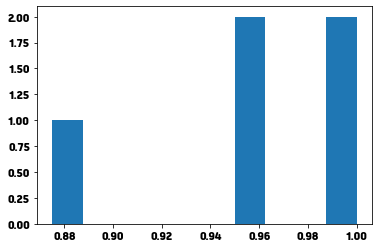

In [324]:
sc3, am3 = print_metrics(knn, X_train_m, y_train_m, 5)
plt.hist(sc3)

--------------- 모델링 선정할 때 사용 <br>
--------------- 다양한 모델을 교차검증을 통해서 대략적으로 선정

### 대략전인 모델 2-3개를 선정했다고 가정
### 모델마다 최적의 하이퍼파라메터가 무엇인지 찾아는 것이
### grid search

In [307]:
grid_params = {
    'n_neighbors' : list(range(1,20)), # 19개
    'weights' : ['uniform', 'distance'], # 2개
    'metric' : ['euclidean', 'manhattan', 'minkowski'] # 3개
} # 19 * 2 * 3
# fold = 5, 19 * 2 * 3 * 5

In [308]:
gs_model = GridSearchCV(knn, grid_params, cv=5)
gs_model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [309]:
gs_model.best_estimator_
# estimator(평가자, 예측자, 최적의 하이퍼파라메터가 적용된 내가 만든 모델)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [310]:
gs_model.best_params_

{'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'uniform'}

In [311]:
{model.best_sre

0.9666666666666667

In [325]:
gs_model = GridSearchCV(knn, grid_params, cv=5)
gs_model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [327]:
gs_model.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [328]:
gs_model.best_params_


{'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'uniform'}

In [329]:
gs_model.best_score_

0.9666666666666667

In [330]:
# {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
best_knn = KNeighborsClassifier(
    metric = 'manhattan', 
    n_neighbors = 14, 
    weights = 'uniform')
best_knn.fit(X_train, y_train) #문제+답 훈련!!!

######test로 예측한 결과값######
pred3 = best_knn.predict(X_test) #모의고사=>작성한 답
acc3 = accuracy_score(y_test, pred3) #작성한 답과 실제답안지 비교
acc3

1.0

In [331]:
# {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
best_knn = KNeighborsClassifier(
    metric = 'euclidean', 
    n_neighbors = 10, 
    weights = 'uniform')
best_knn.fit(X_train, y_train) #문제+답 훈련!!!

######test로 예측한 결과값######
pred3 = best_knn.predict(X_test) #모의고사=>작성한 답
acc3 = accuracy_score(y_test, pred3) #작성한 답과 실제답안지 비교
acc3

1.0

In [341]:
def print_test_metrics(model, X_test, y_test):
    print('*** Test data Accuracy ***')
    pred3 = best_knn.predict(X_test) #모의고사=>작성한 답
    acc3 = accuracy_score(y_test, pred3) #작성한 답과 실제답안지 비교
    print('{:2f}'.format(acc3))
    print('*** Confusion Matrix ***')
    print(confusion_matrix(y_test, pred3))
    print('*** Confusion Matrix(precision) ***')
    print(precision_score(y_test, pred3, average='macro'))
    print('*** classification report ***')
    print(classification_report(y_test, pred))

In [342]:
print_test_metrics(knn, X_test, y_test)

*** Test data Accuracy ***
1.000000
*** Confusion Matrix ***
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
*** Confusion Matrix(precision) ***
1.0
*** classification report ***
              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        10
  versicolor       0.00      0.00      0.00         9
   virginica       0.37      1.00      0.54        11

    accuracy                           0.37        30
   macro avg       0.12      0.33      0.18        30
weighted avg       0.13      0.37      0.20        30



### 정확도는 100%
### 혼동행렬결과 3가지 분류를 완벽하게 함
### 다음의 혼동행렬을 분석해보기
|           | setosa | versicolor | virginica |
|-----------|--------|------------|-----------|
|setosa     | 7      | 2          |  1        |
|versicolor | 2      | 6          |  1        |
|virginica  | 1      | 4          |  6       ||


#### 한 열, 한 열은 estimator가 예측한 값 
#### 한 행은 실제 값
#### 실제 값이 setosa인데 예측한 값이 setosa로 예측한 것이 7개
####                                  versicolor로 예측한 것이 2개
####                                  virginica로 예측한 것이 1개
#### 정확도(accuracy)는?

In [336]:
total = [7,2,1,2,6,1,1,4,6]
print(sum(total))
print(len(total))

30
9


In [337]:
correct = [7, 6, 6]
print(sum(correct))

19


In [338]:
print(19 / 30 * 100) #accuracy

63.33333333333333


### confusion maxtrix를 가지고, 2가지를 생각핼볼 수 있다. 
### 원래 실제값 중에서 어떤 것을 맞추고 어떤 것을 못 맞추었는지?
### 예측한 값 중에서 어떤 것을 맞추고, 어떤 것을 못 맞추었는지?

accuracy/ precision / recall <br>
avg(f-score)


## regression(회귀) : 숫자값을 예측하는 것
#### 컴퓨터는 정확한 값을 예측 불가능
#### 회귀의 정확도를 구할 때 실제값과 얼마나 가깝게 맞우었는가로 정확도를 평가
#### 잘못 맞춘 경우(실제값과 예측값이 먼 경우) 오차가 크다라고 표현
#### 좋은 모델은 오차가 작아야 한다.
#### 거리를 재서 오차를 확인 => 숫자가 +,-가 나오므로
#### 절대값을 씌우거나, 제곱(루트)을 해서 오차를 계산
#### RMSE, ROC, AUC

### 1. 데이터 분석 전 과정은?
#### 문제 정의 >>> 데이터 수집 >>> 데이터 전처리 >>> 데이터 모델링 >>> 시각화 및 탐색<br> 데이터프레임을 만들어서, 훈련+테스트데이터로 나누고, 훈련데이터로 훈련(문제+정답)을하고, 테스트데이터로 검증(predict(테스트 문제)해서 정답과 비교), 정확도 비교

### 2. 모델을 선정하고 나서 train, test데이터로 나누어 어떻게 진행하는가?
#### 훈련데이터로 훈련(문제+정답)을하고, 테스트데이터로 검증(predict(테스트 문제)해서 정답과 비교)

### 3. 교차검증을 왜 하는가?
#### 여러 다양한 샘플을 가지고, 최적의 모델을 찾을 때 사용

### 4. confusion maxtrix는 무엇인가?
#### 혼돈 행렬,분류에서 정답비율과 오답비율을 자세히 알고자 하는 경우

### 5. 분류에서 정확도를 나타내는 말은?
#### accuracy

### 6. k-fold란?
#### 여러번 샘플링 할 때 검증용 데이터의 크기를 말한다.
#### 데이터를 k개의 분할로 나누어 k개의 모델을 만들어 k-1개의 분할에서 훈련하고 나머지 분할에서 평가하는 방법

### 7. model.predict(?)에 들어갈 변수와 결과는?
#### 테스트 데이터의 문제, 문제를 푼 컴퓨터가 예측한 정답

### 8. confusion matrix 다음은 어떤 의미인가?(titanic data) <br> [[25, 5],[4, 26]]
#### 실제로 30명이 살아있었는데, 25명이 살았다고 예측했고, 5명이 죽었다고 예측<br> 실제로 30명이 죽었는데, 4명은 살았다고 예측했고 26명이 죽었다고 예측함<br>정확도는 51/60 * 100

### 9. knn은 어떤 모델인가? 유클리디안 거리와 맨하탄 거리를 비교?
####  K-최근접 이웃(K-Nearest Neighbor, KNN) : 어떤 데이터가 주어지면 그 주변(이웃)의 데이터를 살펴본 뒤 더 많은 데이터가 포함되어 있는 범주로 분류 <br> 유클리디안 거리는 각 차원의 차를 제곱하는 것이지만 맨하탄 거리는 절대값을 바로 합산하여 사용
#### 분류할 때 홀수로 거리상으로 제일 가까운 데이터드을 찾아서 다수결로 어떤 값인지 분류하는 방법,<br> 거리를 잴때 직선으로 구하면 유클리디안 거리, 계단식으로 구하면 맨하탄 거리가 됨

### 10. accuracy_score(y_test, pred)이 의미하는 것은?
#### y_test는 컴퓨터가 예측해야하는 정답, pred은 컴퓨터가 예측한 정답<br>컴퓨터 예측한 정답률을 구하는 함수

### 11. estimator와 같은 말 2개를 쓰시오
#### 모델, 방법론, 알고리즘

### 12. 모델 객체 생성시 분석가가 임의로 넣을 수 있는 것을 무엇이라고 하는가? 최적의 값을 넣어 모델 객체를 만드는 것을 무엇이라고 하는가?
#### 하이퍼파라메터<---->모델 파라메터, <br> 하이퍼파라메터, 엔지니어링, 속성공학

### 13. svm은 합습률 c, 휘어지는 정도 gamma가 파라메터이다 <br> c : [0.1, 1, 10, 100], gamma : [0.01, 0.1, 1, 10], k-fold값 10이라고 했을 때, 교차 검증의 횟수는?
#### 4 * 4 * 10 = 160

### 14. 데이터 형태는 numeric, non-numeric이 있다. 각각의 예들 드시오.
#### numeric에는 연속형, 카테고리형<br>non-numeric에는 문자열

### 15. 스케일링의 대표적인 2가지 방법을 비교 설명
#### 표준화 : Standardization,특성들의 평균을 0, 분산을 1 로 스케일링하는 것<br>즉, 특성들을 정규분포로 만드는 것
#### 정규화 : Normalization, 특성들을 특정 범위(주로 [0,1]) 로 스케일링 하는 것<br>작은 값은 0, 가장 큰 값은 1 로 변환되므로, 모든 특성들은 [0, 1] 범위를 갖게된다.

### 16. 머신러닝의 sklearn라이브러리 중 metrics패키지에 들어가는 대표적인 함수 2개는?
#### accuracy_score, classification_report